# *Oasis Infobyte*
## *Data Science Internship*
## *Mohit Raje*

## *Task : 4*
## *Topic : EMAIL SPAM DETECTION WITH MACHINE LEARNING*
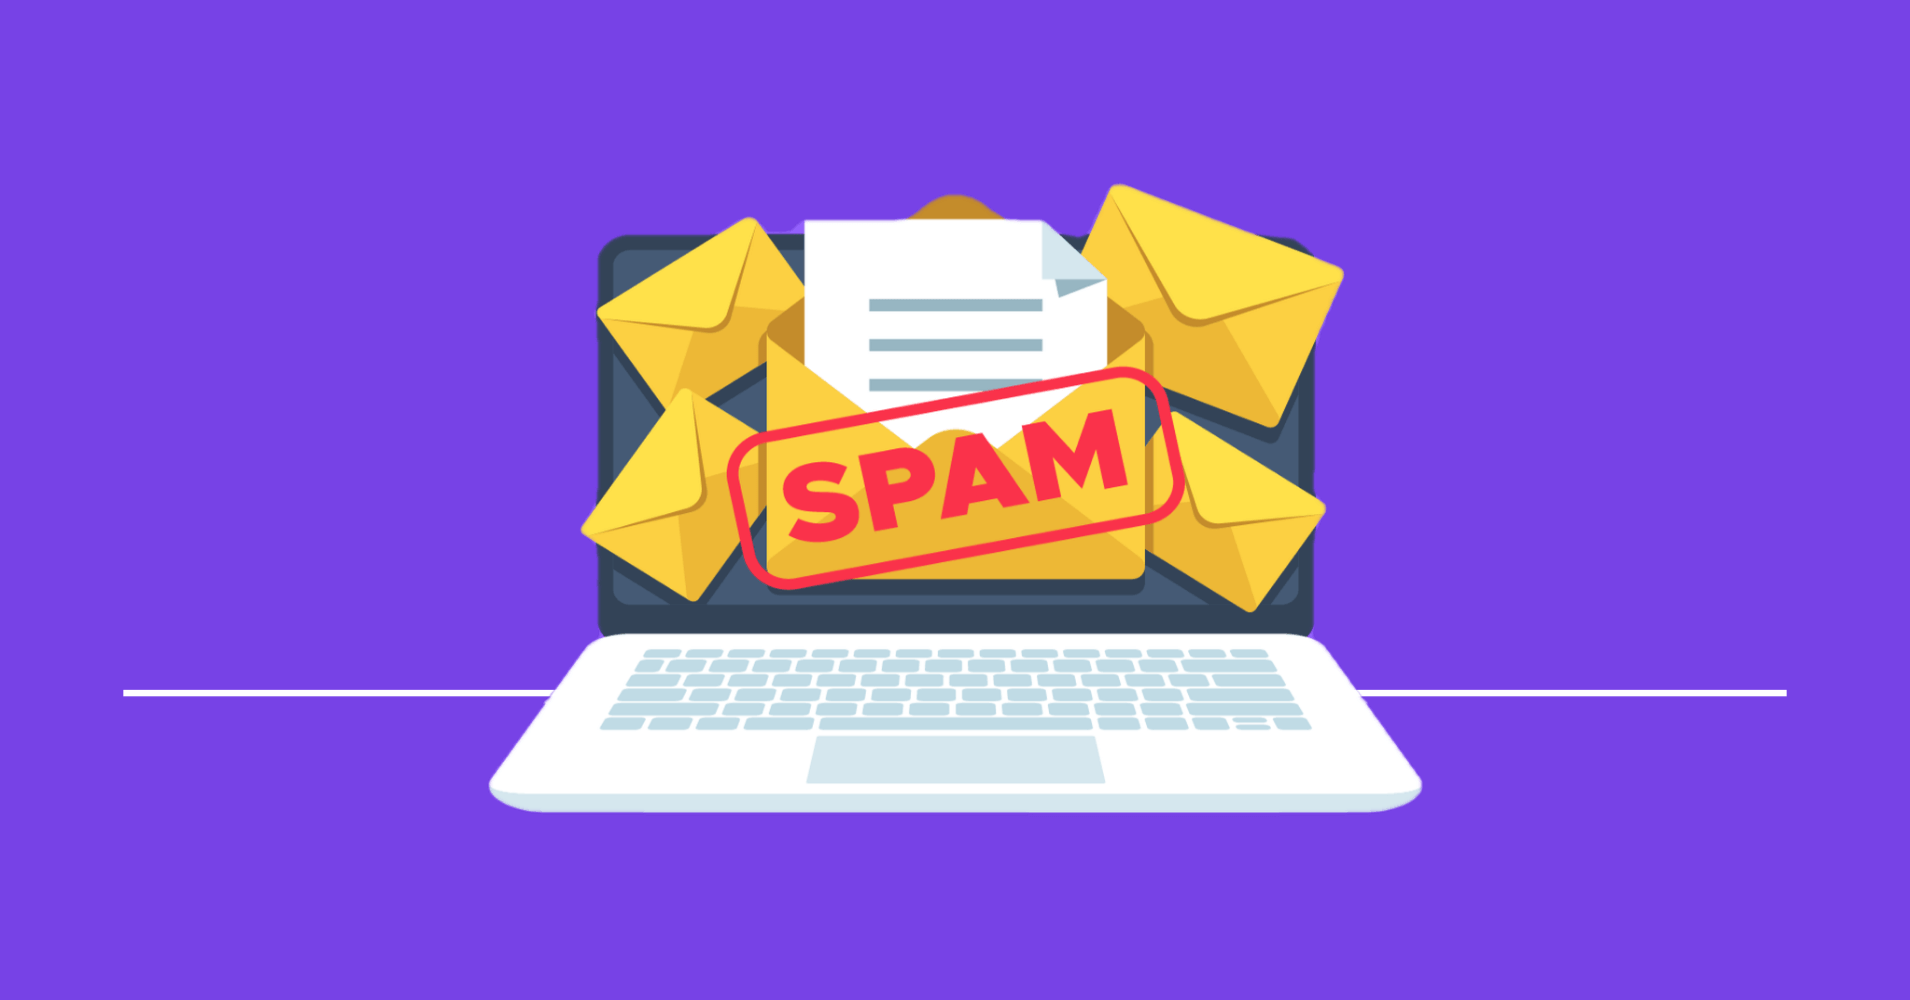

## *Importing Libraries*

In [53]:
import numpy as pn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## *Importing dataset*

In [54]:
df=pd.read_csv("spam.csv")

In [55]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## *Data analysis and Visualization*

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [57]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


<Axes: >

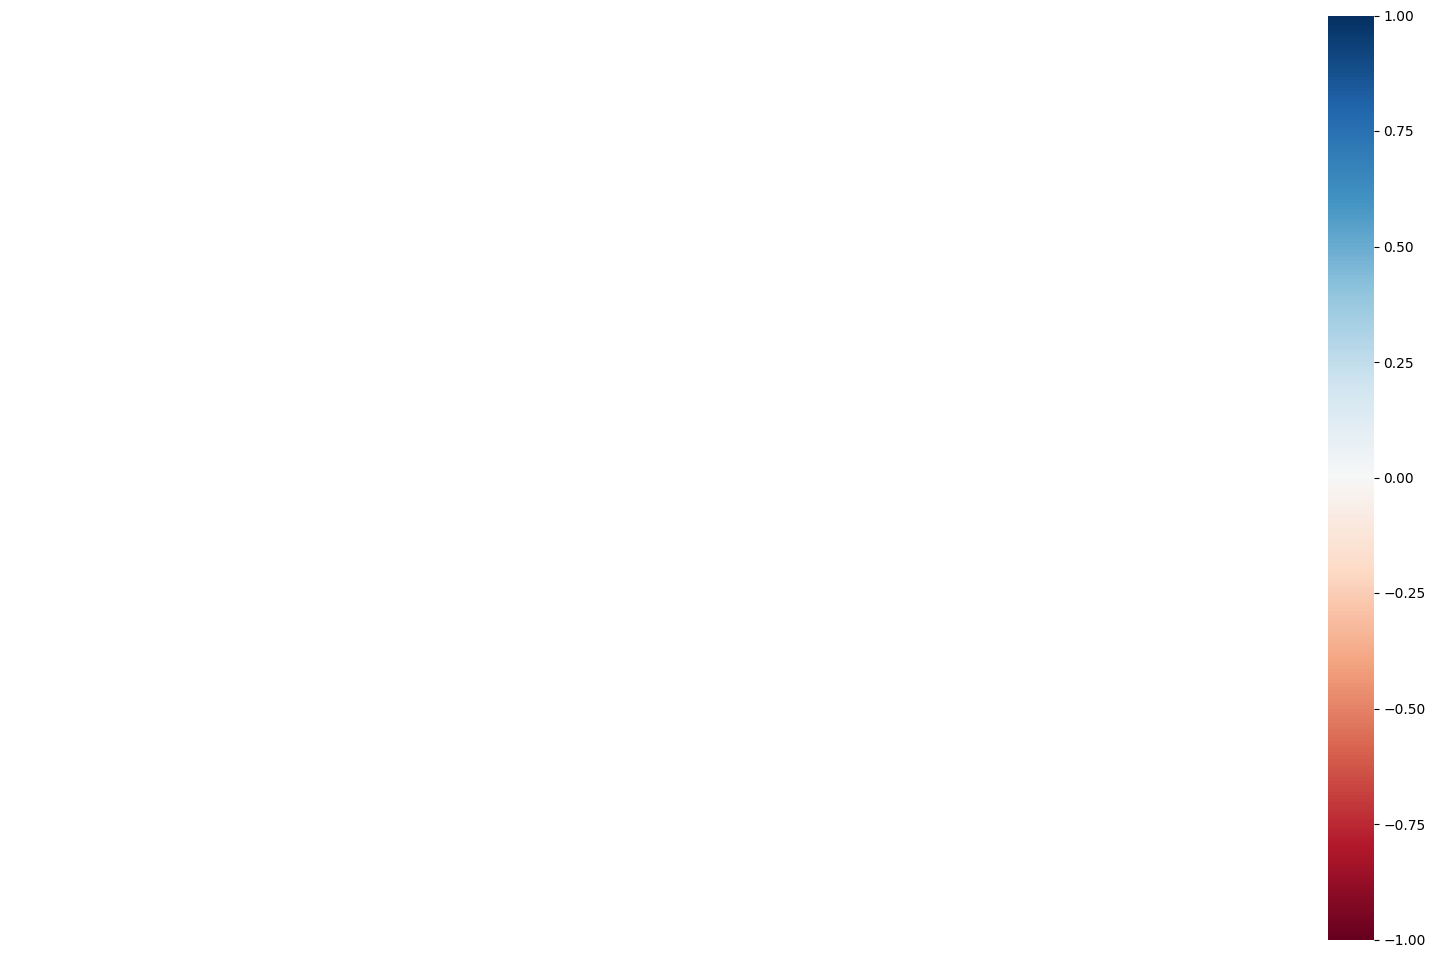

In [58]:
## Checking whether there are missing values or not
import warnings
warnings.filterwarnings('ignore')
msno.heatmap(df)

In [59]:
## No Missing data found

In [61]:
df.shape

(5572, 2)

In [62]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [63]:
grpobj=df.groupby('Category')

In [64]:
df_numeric_data=grpobj.count()

In [66]:
df_numeric_data

,Message
Category,
ham,4825
spam,747


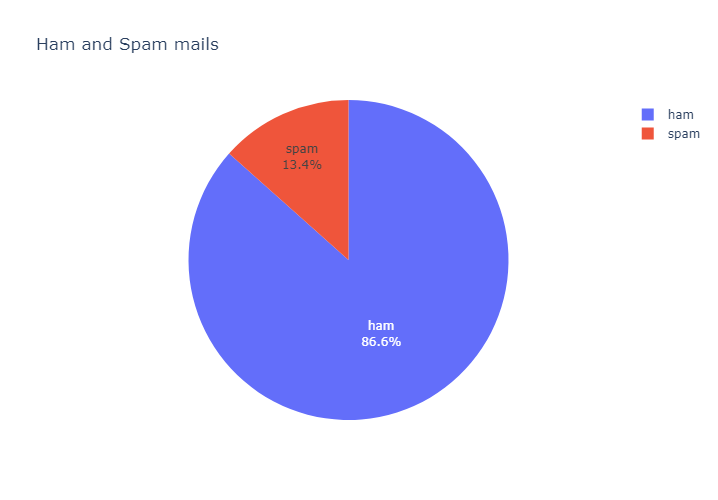

In [67]:
import plotly.express as px
fig=px.pie(df_numeric_data , names=['ham' , 'spam'] , values='Message' , title='Ham and Spam mails')
fig.update_traces(textinfo="percent + label")
fig.update_layout(autosize=False , width=500 , height=500)
fig.show()

In [68]:
## Label Encoding : ham mail as 1 , spam mail as 0

df.loc[df['Category']=='spam' , 'Category']=0
df.loc[df['Category']=='ham' , 'Category'] = 1


In [69]:
df.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [70]:
X=df['Message']
Y=df['Category']

In [71]:
X.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Message, dtype: object

In [72]:
Y.head()

0    1
1    1
2    0
3    1
4    1
Name: Category, dtype: object

## *Spliting data into training and testing data*

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.3 , random_state=101)

In [76]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(3900,)
(1672,)


## Feature Extraction

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [78]:
#transform the text data to feature vectors that can be used as input to logisticRegression

feature_extraction=TfidfVectorizer(min_df=1 ,stop_words='english' , lowercase=True )

X_train_feature = feature_extraction.fit_transform(X_train)
X_test_feature = feature_extraction.transform(X_test)

Y_train=Y_train.astype('int')
Y_test=Y_test.astype('int')

In [79]:
print(X_train)

4028        Yes, princess. Are you going to make me moan?
1310              Ok, be careful ! Don't text and drive !
5469                                              Ok lor.
5375    I cant pick the phone right now. Pls send a me...
3814                Pls i wont belive god.not only jesus.
                              ...                        
4171    Mmmmmm ... I love you,so much, Ahmad ... I can...
599     Will do. Was exhausted on train this morning. ...
1361    Yo dude guess who just got arrested the other day
1547                Shant disturb u anymore... Jia you...
4959                     Why didn't u call on your lunch?
Name: Message, Length: 3900, dtype: object


In [80]:
print(X_train_feature)

  (0, 4125)	0.58239356632218
  (0, 3926)	0.39681316611665385
  (0, 2878)	0.35305427800305766
  (0, 4900)	0.48119376662725283
  (0, 6938)	0.38361736254479684
  (1, 2248)	0.516585993885075
  (1, 6149)	0.34535342347257325
  (1, 2202)	0.3582900881599898
  (1, 1517)	0.6206565632756122
  (1, 4454)	0.31667580742259943
  (2, 3815)	0.7518886813089152
  (2, 4454)	0.6592900810110377
  (3, 4045)	0.4161302660360058
  (3, 5441)	0.3648876762060178
  (3, 4757)	0.40155883163929695
  (3, 5242)	0.429412243248567
  (3, 4692)	0.3927987708129881
  (3, 4704)	0.44017876047158067
  (4, 3455)	0.4997664089586293
  (4, 2873)	0.3992362011112345
  (4, 1204)	0.5731959558424692
  (4, 6836)	0.3944599944365768
  (4, 4757)	0.3266369562584736
  (5, 2856)	0.8165412290029955
  (5, 6938)	0.5772871220963427
  :	:
  (3895, 1198)	0.3062269250867482
  (3895, 6643)	0.2183824303127064
  (3895, 3026)	0.20430073815796984
  (3895, 4317)	0.1868601001938423
  (3895, 3836)	0.35443700170306824
  (3895, 5413)	0.2650629956255759
  (3896, 

## *Machine Learning*

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
model=LogisticRegression()

## *Training model*

In [83]:
model.fit(X_train_feature , Y_train)

LogisticRegression()

## *Making prediction*

In [84]:
pred=model.predict(X_test_feature)

## *Tesing the accuracy of the model , with testing data* 

In [85]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

In [86]:
print(confusion_matrix(Y_test , pred))

[[ 125   72]
 [   4 1471]]


In [87]:
print(classification_report(Y_test , pred))

              precision    recall  f1-score   support

           0       0.97      0.63      0.77       197
           1       0.95      1.00      0.97      1475

    accuracy                           0.95      1672
   macro avg       0.96      0.82      0.87      1672
weighted avg       0.96      0.95      0.95      1672



In [88]:
print("Accuracy of the model is {}".format(accuracy_score(pred  , Y_test)))

Accuracy of the model is 0.9545454545454546


## Building a predictive system

In [90]:
input_mail=['Congrats you have won a lottery worth rs 100000 , provide your account details to claim the reward']

#input_mail=['hey dan how are you its been a long time we didnt met can we catch up this weekend']

final_input_mail=feature_extraction.transform(input_mail)

result=model.predict(final_input_mail)

if result==1:
    print("It's a ham mail")
else:
    print("It's a spam mail")

It's a spam mail


## *Thank You*